# Social Media Clustering and Fitting 

In [168]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import normalize
from sklearn.metrics import silhouette_score
from scipy.optimize import curve_fit
from scipy.stats import linregress
import warnings
warnings.filterwarnings('ignore')

In [169]:
#Reading data set

In [170]:
data = pd.read_csv('social media.csv')

In [171]:
data

,age,gender,time_spent,platform,interests,location,demographics,profession,income,indebt,isHomeOwner,Owns_Car
0,56,male,3,Instagram,Sports,United Kingdom,Urban,Software Engineer,19774,True,False,False
1,46,female,2,Facebook,Travel,United Kingdom,Urban,Student,10564,True,True,True
2,32,male,8,Instagram,Sports,Australia,Sub_Urban,Marketer Manager,13258,False,False,False
3,60,non-binary,5,Instagram,Travel,United Kingdom,Urban,Student,12500,False,True,False
4,25,male,1,Instagram,Lifestlye,Australia,Urban,Software Engineer,14566,False,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...
995,22,female,8,Instagram,Lifestlye,United Kingdom,Rural,Marketer Manager,18536,False,True,False
996,40,non-binary,6,YouTube,Travel,United Kingdom,Rural,Software Engineer,12711,True,False,False
997,27,non-binary,5,YouTube,Travel,United Kingdom,Rural,Student,17595,True,False,True
998,61,female,4,YouTube,Sports,Australia,Sub_Urban,Marketer Manager,16273,True,True,False


In [172]:
data.describe()

,age,time_spent,income
count,1000.000000,1000.000000,1000.000000
mean,40.986000,5.029000,15014.823000
std,13.497852,2.537834,2958.628221
min,18.000000,1.000000,10012.000000
25%,29.000000,3.000000,12402.250000
50%,42.000000,5.000000,14904.500000
75%,52.000000,7.000000,17674.250000
max,64.000000,9.000000,19980.000000


In [173]:
#Basic mathematical functions

In [174]:
data.max()

age                        64
gender             non-binary
time_spent                  9
platform              YouTube
interests              Travel
location        United States
demographics            Urban
profession            Student
income                  19980
indebt                   True
isHomeOwner              True
Owns_Car                 True
dtype: object

In [175]:
data.min()

age                           18
gender                    female
time_spent                     1
platform                Facebook
interests              Lifestlye
location               Australia
demographics               Rural
profession      Marketer Manager
income                     10012
indebt                     False
isHomeOwner                False
Owns_Car                   False
dtype: object

In [176]:
data[['age','time_spent','income']].corr()

,age,time_spent,income
age,1.000000,-0.033827,-0.087391
time_spent,-0.033827,1.000000,0.004757
income,-0.087391,0.004757,1.000000


In [177]:
data[['age','time_spent','income']].std()

age             13.497852
time_spent       2.537834
income        2958.628221
dtype: float64

In [178]:
data[['age','time_spent','income']].mean()

age              40.986
time_spent        5.029
income        15014.823
dtype: float64

In [179]:
data[['age','time_spent','income']].median()

age              42.0
time_spent        5.0
income        14904.5
dtype: float64

In [180]:
kurtosis= pd.DataFrame(data['age']).kurtosis()[0]
skew = pd.DataFrame(data['age']).skew()[0]

In [181]:
print(kurtosis,skew)

-1.1504717408833967 -0.046883220802412674


In [182]:
#Grouping by age 

In [183]:
df=data[['age','income','time_spent']]
df

,age,income,time_spent
0,56,19774,3
1,46,10564,2
2,32,13258,8
3,60,12500,5
4,25,14566,1
...,...,...,...
995,22,18536,8
996,40,12711,6
997,27,17595,5
998,61,16273,4


In [184]:
grp_age = df.groupby('age')

In [185]:
summary_age=grp_age.mean('age')
summary_age=summary_age.reset_index()
summary_age

,age,income,time_spent
0,18,16880.640000,5.240000
1,19,14016.041667,5.916667
2,20,15208.500000,5.750000
3,21,14880.842105,5.315789
4,22,15755.560000,5.160000
5,23,14775.826087,4.260870
6,24,14512.571429,5.357143
7,25,14922.478261,4.652174
8,26,14786.888889,4.277778
9,27,15026.666667,4.666667


In [186]:
#Plotting graphical functions

In [187]:
def relational_graph(data):
   
 
    plt.figure(figsize=(8, 6))
    plt.plot(summary_age['age'],summary_age['time_spent'], color='#a816f7', alpha=0.5)
    plt.xlabel('age')
    plt.ylabel('time_spent')
    plt.title('Relational Graph: age vs Time_spent')
    plt.grid(True)
    plt.savefig('Line graph.png')
    plt.show()

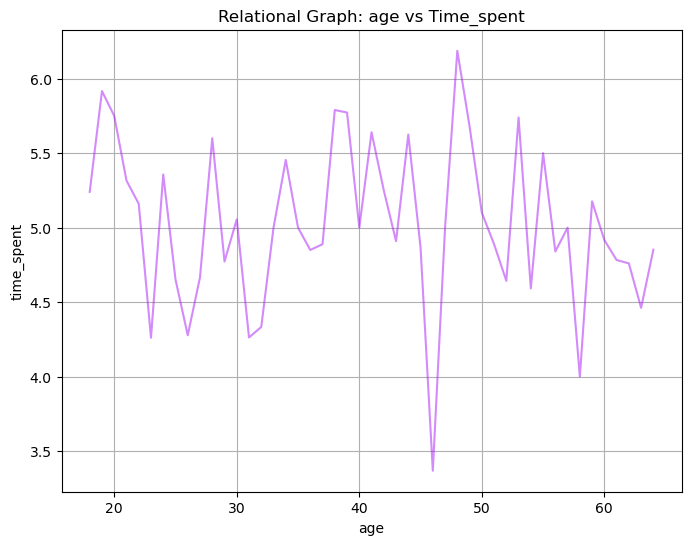

In [188]:
relational_graph(data)

In [189]:
def histogram():
    data.hist(bins=40)
    plt.xlim([0,1000])
    plt.ylim([50,5000])
    plt.yscale('log')
    plt.title("social media")
    plt.savefig('histogram.png')
    plt.show()

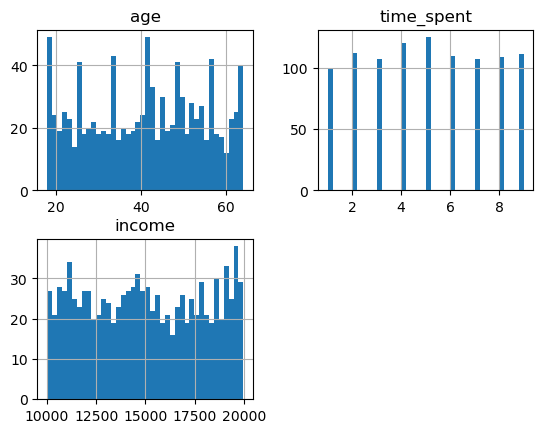

In [190]:
histogram()

In [191]:
def statistical_graph(data):
   
    plt.figure(figsize=(15, 5))
    sns.boxplot(x='age', y='income', data=data, palette='rocket')
    plt.xlabel('age')
    plt.ylabel(' Income ')
    plt.title('Statistical Graph:Income by age')
    plt.savefig('Box graph.png')
    plt.show()
    

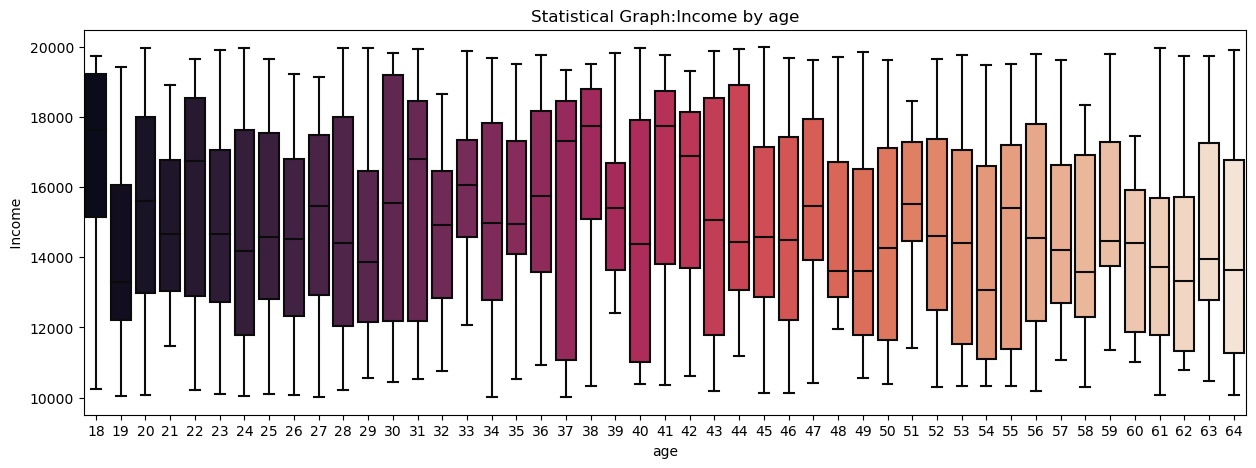

In [192]:
statistical_graph(data)

In [193]:
numeric_data = data.select_dtypes(include=['int64', 'float64'])


In [194]:
corr = numeric_data.corr()

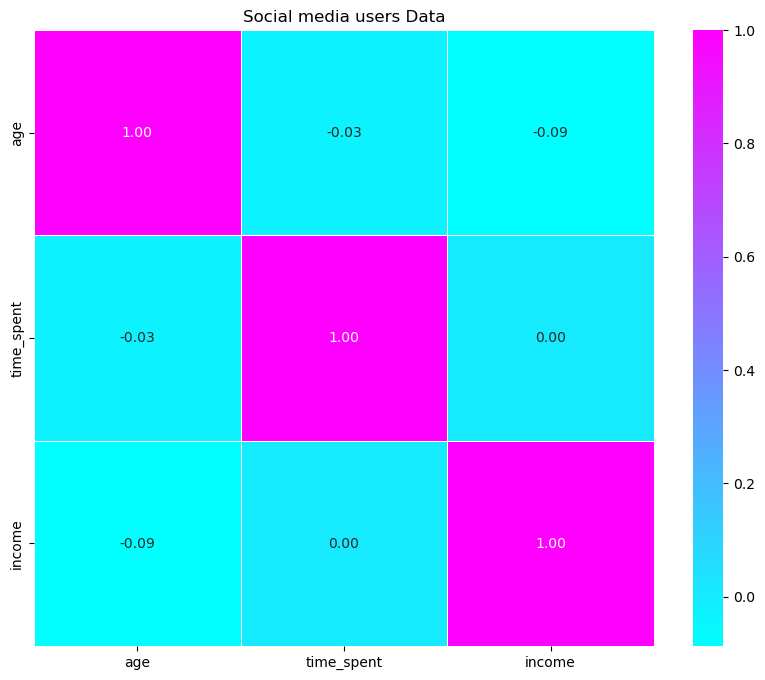

In [195]:
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='cool', fmt=".2f", linewidths=0.5)
plt.title('Social media users Data')
plt.savefig('Heatmap graph.png')
plt.show()

In [196]:
#Clustering/Elbow Method:

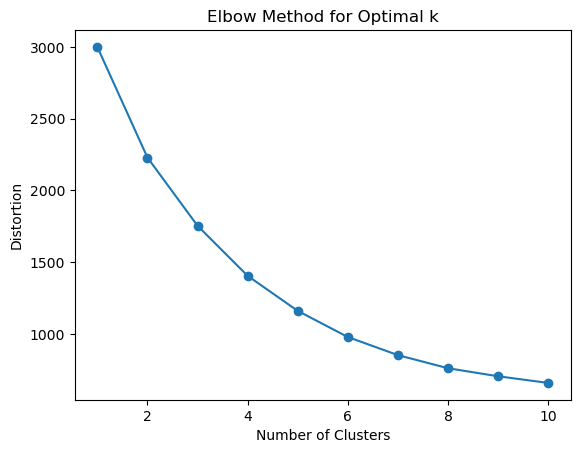

In [197]:
# Determining the Optimal Number of Clusters using the Elbow Method
def determine_num_clusters_elbow(data):
    distortions = []
    for i in range(1, 11):
        kmeans = KMeans(n_clusters=i, random_state=42)
        kmeans.fit(data)
        distortions.append(kmeans.inertia_)
 # Plotting the Elbow Method
    plt.plot(range(1, 11), distortions, marker='o')
    plt.title('Elbow Method for Optimal k')
    plt.xlabel('Number of Clusters')
    plt.ylabel('Distortion')
    plt.savefig('Elbow method.png')
    plt.show()
    
#Select Relevant Features
X = data[['age', 'income', 'time_spent']]

#Normalize and Scaling
scaler = StandardScaler()
scaled_data = scaler.fit_transform(X)

#Optimal Number of Clusters
determine_num_clusters_elbow(scaled_data)


In [198]:
df=data[['age','income','time_spent']]
df

,age,income,time_spent
0,56,19774,3
1,46,10564,2
2,32,13258,8
3,60,12500,5
4,25,14566,1
...,...,...,...
995,22,18536,8
996,40,12711,6
997,27,17595,5
998,61,16273,4


In [199]:
#Silhouette Score:
#Determining the Optimal Number of Clusters.
def determine_num_clusters_silhouette(df):
    silhouette_scores = []
    for num_clusters in range(2, 11):
        kmeans = KMeans(n_clusters=num_clusters, random_state=42)
        cluster_labels = kmeans.fit_predict(df)
        silhouette_scores.append(silhouette_score(df, cluster_labels))
    
    # Plotting the Silhouette Scores
    plt.plot(range(2, 11), silhouette_scores, marker='o')
    plt.title('Silhouette Score')
    plt.xlabel('Number of Clusters')
    plt.ylabel('Silhouette Score')
    plt.savefig('Silhouette.png')
    plt.show()

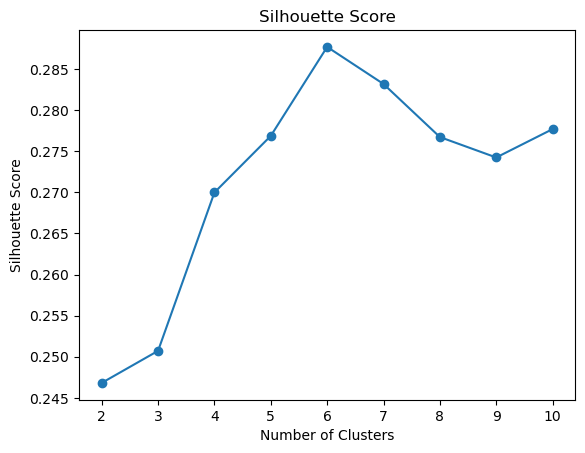

In [200]:
#Normalize and Scaling
scaler = StandardScaler()
scaled_data = scaler.fit_transform(X)

# Number of Clusters 
determine_num_clusters_silhouette(scaled_data)


In [201]:
# Clustering Function

In [202]:

def clustering_function(data, num_clusters):

    scaler = StandardScaler()
    scaled_data = scaler.fit_transform(data)
    kmeans = KMeans(n_clusters=num_clusters, random_state=42)
    clusters = kmeans.fit_predict(scaled_data)
    data_with_clusters = data.copy()
    data_with_clusters['Cluster'] = clusters
    return data_with_clusters

# Selecting Relevant Features
X = data[['age', 'income', 'time_spent']]

# Perform KMeans Clustering 
num_clusters = 5 
clustered_data = clustering_function(X, num_clusters)

#  Clustered Data
print("Clustered Data:\n", clustered_data.head())


Clustered Data:
    age  income  time_spent  Cluster
0   56   19774           3        2
1   46   10564           2        1
2   32   13258           8        3
3   60   12500           5        1
4   25   14566           1        4


In [203]:

kmeans = KMeans(n_clusters=5, random_state=0)
kmeans.fit(X)

KMeans(n_clusters=5, random_state=0)

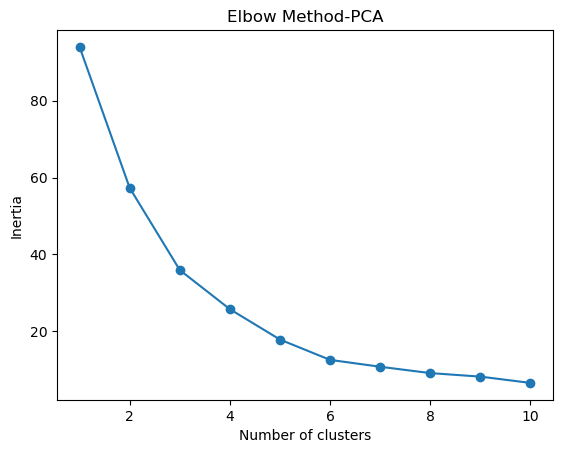

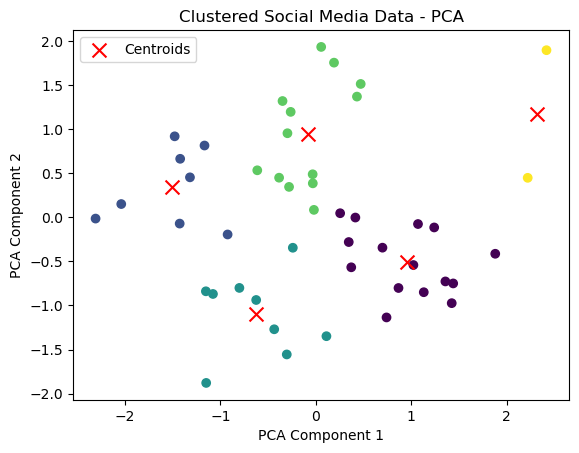

In [204]:
from sklearn.decomposition import PCA
# Select features 
X = summary_age[['age', 'time_spent']].values

# Standardizing
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply PCA to reduce dimensionality
pca =PCA(n_components=2)  
X_pca = pca.fit_transform(X_scaled)

# Calculate inertia for different numbers of clusters.
inertia = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, n_init=10, random_state=60)
    kmeans.fit(X_pca)
    inertia.append(kmeans.inertia_)

# Plotting the elbow curve.
plt.plot(range(1, 11), inertia, marker='o')
plt.title('Elbow Method-PCA')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

# Determine the optimal number of clusters 
optimal_n_clusters = 5

# Perform K-means clustering 
kmeans = KMeans(n_clusters=optimal_n_clusters, n_init=10, random_state=60)
kmeans.fit(X_pca)

clusters = kmeans.predict(X_pca)

# Visualize the clusters in 2D
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=clusters, cmap='viridis')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], marker='x', s=100, c='red', label='Centroids')
plt.title('Clustered Social Media Data - PCA')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend()
plt.savefig('clustering.png')
plt.show()


In [205]:
#fitting

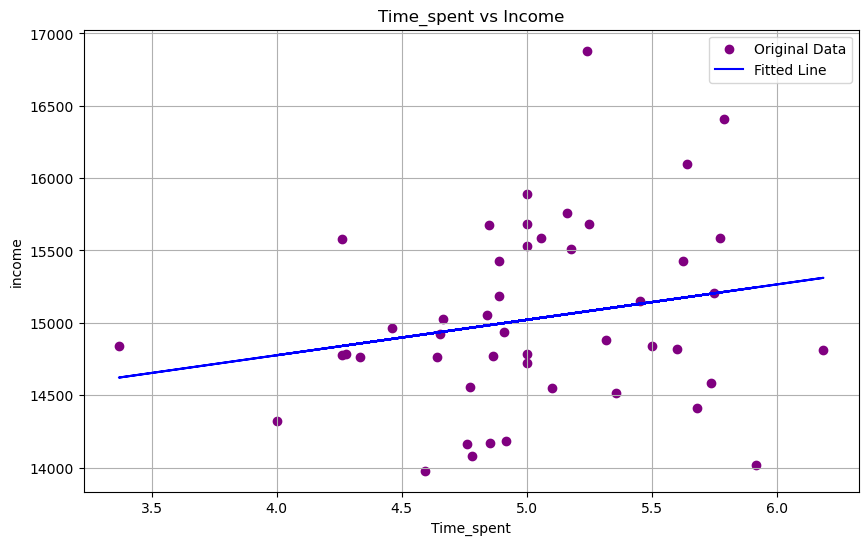

In [206]:

# Extract data
time_spent = summary_age['time_spent']
income = summary_age['income']

#Linear regression
slope, intercept, r_value, p_value, std_err = linregress(time_spent,income)


fit_line = slope * time_spent + intercept

# Plot original data and fitted line
plt.figure(figsize=(10, 6))
plt.scatter(time_spent,income, label='Original Data', color='purple')
plt.plot(time_spent, fit_line, color='blue', label='Fitted Line')

#Labels and legend
plt.xlabel('Time_spent')
plt.ylabel('income')
plt.title('Time_spent vs Income')
plt.legend()

# Show plot
plt.savefig('Fitting1.png')
plt.grid(True)
plt.show()

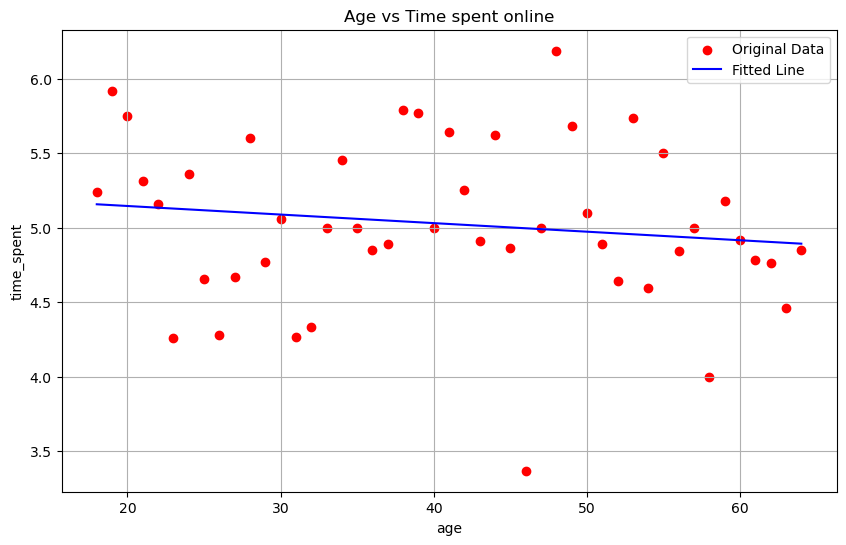

In [207]:

# Extracting data
age = summary_age['age']
time_spent = summary_age['time_spent']

# Perform linear regression
slope, intercept, r_value, p_value, std_err = linregress(age,time_spent)


fit_line = slope * age + intercept

# Plot original data and fitted line
plt.figure(figsize=(10, 6))
plt.scatter(age,time_spent, label='Original Data', color='red')
plt.plot(age, fit_line, color='blue', label='Fitted Line')

#labels and legend
plt.xlabel('age')
plt.ylabel('time_spent')
plt.title('Age vs Time spent online')
plt.legend()

# Show plot
plt.savefig('fitting2.png')
plt.grid(True)
plt.show()